In [1]:
%matplotlib widget

In [2]:
import sys
sys.path.append('../..')
from lcs import SRC_ROOT
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from lcs.configs import Config
from run_script import get_data
from lcs import TEXTWIDTH, PAGEHEIGHT
from lcs.plotting_utils import *

In [46]:
cfg = Config(input_size=20,
       output_size=6,
       num_seeds=10, 
       num_contexts=3,
       num_paths=3,
       batch_size=200,
       initialization_scale=0.01,
       regularization_strength=0.2,
       num_layers=1,
       hidden_size=6,
       context_model=True,
       name='nonorthog_L1',
       regularization_type=[('nonnegative', 1),
                            ('gating_manifold_L1', 5.)],
       shared_teachers=True,
       shared_concat_teachers=False,
       c_gt_curriculum="AB_BC_CA__",
       Y_tgt=None,
       W_teachers='generate',
       use_X=True,
       metric='cosine',
       teacher_mode='orthogonal',
       num_blocks=50,
       t_tot=50,
       T_tot=1000,
       block_duration=1.0,
       W_lr=None,
       W1_lr=None,
       W2_lr=None,
       c_lr=None,
       W_tau=0.05,
       W1_tau=None,
       W2_tau=None,
       c_tau=0.03,
       dt=0.001,
       log_every=1,
       T_tape=10000,
       dt_tape=0.001,
       control='',
       data_out_dir='data_internal/nonorthog_comp/',
       results_out_dir='results_internal/nonorthog_comp/',
       num_shared_contexts=0,
       mixing_factor=0.5,
       W_regularization_strength=0.0,
       turn_off_regularization=False,
       log_aux=False,
        )

In [47]:
tape, args = get_data(cfg)

[WARNING] [2024-09-19 14:27:10,334] in run_script: Data found at data_internal/joint_learning/nonorthog_task/nonorthog_L1 but with different config. Re-running simulation.
[INFO] [2024-09-19 14:27:10,552] in lcs.joint_learning: Running 10 seeds on device TFRT_CPU_0 with config Config(input_size=20,
       output_size=6,
       num_seeds=10,
       num_contexts=3,
       num_paths=3,
       batch_size=200,
       initialization_scale=0.01,
       gate_second=True,
       turn_off_regularization=False,
       regularization_strength=0.2,
       num_layers=1,
       hidden_size=6,
       context_model=True,
       name='nonorthog_L1',
       regularization_type=[('nonnegative', 1), ('gating_manifold_L1', 5.0)],
       shared_teachers=True,
       shared_concat_teachers=False,
       c_gt_curriculum='AB_BC_CA__',
       Y_tgt=None,
       W_teachers='generate',
       use_X=True,
       metric='cosine',
       teacher_mode='orthogonal',
       teacher_xx=0.0,
       t_tot=50,
       T_tot=

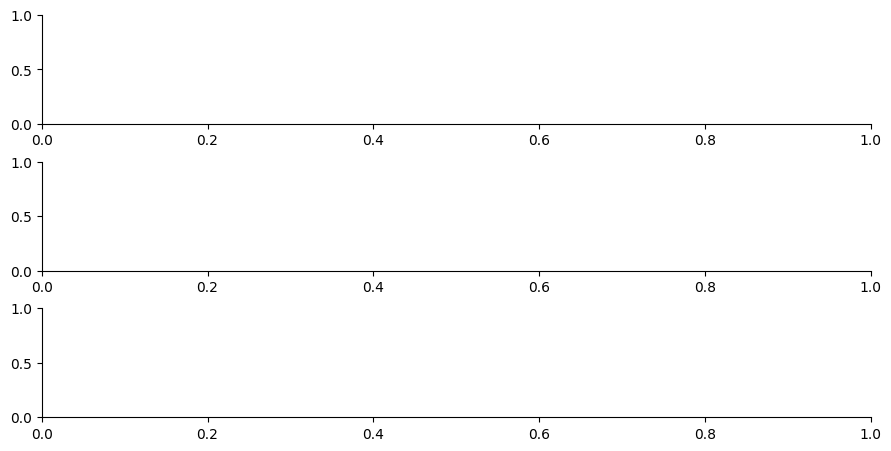

In [52]:
s = 2
fig = plt.figure(figsize=(s*TEXTWIDTH*.8, s*PAGEHEIGHT*0.2), layout='constrained')

mosaic = """
b
c
d
"""

axd = fig.subplot_mosaic(mosaic)

ax_loss = axd['b']
ax_c = axd['c']
ax_cossim = axd['d']
fig

In [53]:
ax = ax_loss
plot_loss(ax, tape, args)
ax.set_yticks([0, 0.5, 1])
ax.dataLim.y0 = 0.
ax.dataLim.y1 = 1.1
ax.autoscale_view()

ax = ax_c
plot_c(ax, tape, args,)
ax.set_yticks([0, 0.5, 1])
ax.dataLim.y0 = 0.
ax.dataLim.y1 = 1.1
ax.autoscale_view()

ax = ax_cossim
plot_similarity(ax, tape, args,)

ax_loss.set_ylabel(r'loss $\mathcal{L}$')
ax_c.set_ylabel(r'gates $c^p$')
ax_cossim.set_ylabel('student-teacher' + '\n' + 'alignment ' + r'$\langle \boldsymbol{W}^{m\star} \boldsymbol{W}^{p T}\rangle$')

ax_cossim.set_xlabel(r'time $t$')


Text(0.5, -2.7771111111111075, 'time $t$')

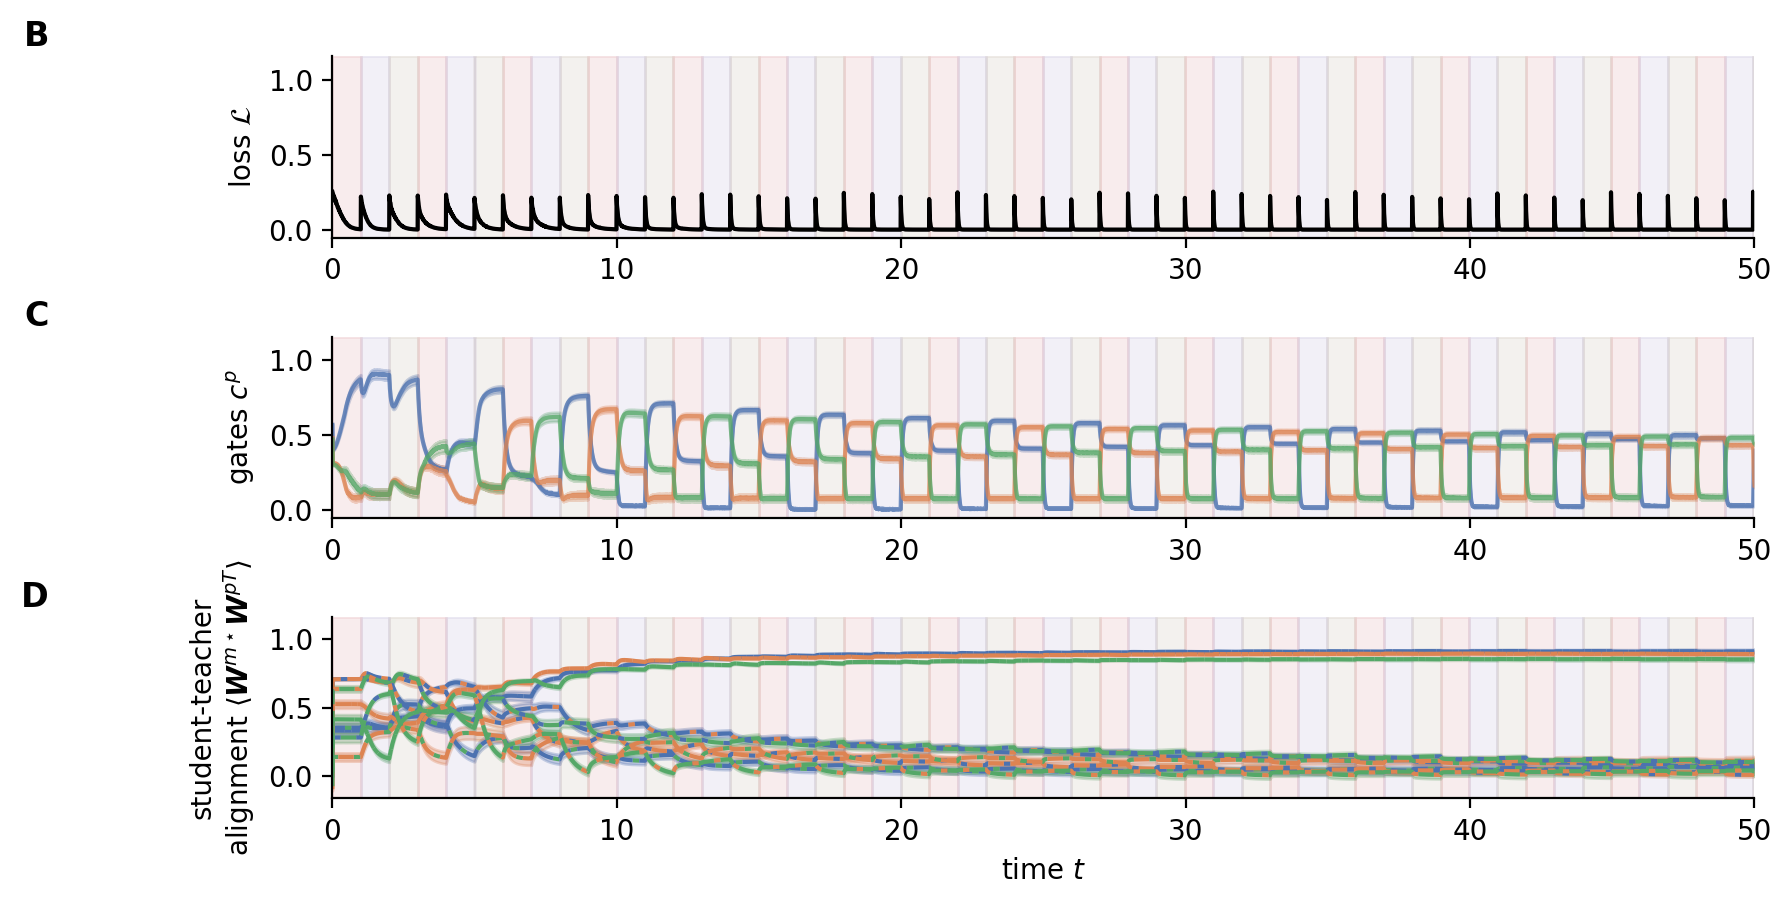

In [54]:
setup_axes_labels(axd)
for k, ax in axd.items():
    indicate_contexts_old(ax, tape, args)
    ax.set_xlim(0, tape.t.max())
    ax.set_xticks([0, 10, 20, 30, 40, 50])
fig